### Anomaly Detection Methods

This document outlines various methods for detecting anomalies in machines using data that represents normal operation.

--- 

#### a. Statistical Methods

**Z-Score** : Detects anomalies by measuring the number of standard deviations a data point is away from the mean. Useful for data that follows a normal distribution.

**Thresholding** : Define explicit upper and lower bounds for what is considered normal values. Simple to implement and works well for known ranges.


--- 

    
#### b. Clustering Methods

**K-Means Clustering**: Identifies clusters of normal operation data; points that fall far from any cluster centroids are considered anomalies. Effective for data that naturally forms clusters.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A density-based clustering method that finds anomalies as points in low-density regions. Suitable for data with varying density.


---
#### c. Reconstruction-Based Methods

**Autoencoders**: Neural networks trained to reconstruct normal data. Anomalies will have higher reconstruction errors. Works well for complex data patterns.

**Principal Component Analysis (PCA)**: Reduces dimensionality and identifies anomalies as points that don't project well into the lower-dimensional space. Effective for high-dimensional data.


---
#### d. One-Class Classification

**One-Class SVM**: A Support Vector Machine algorithm trained to recognize data from one class (normal operation) and detect outliers. Effective for various types of data distributions.


---
#### Additional Methods

**Isolation Forest**: An ensemble method that isolates observations by randomly selecting a feature and then randomly selecting a split value. Effective for large datasets and can handle high-dimensional data.

**Local Outlier Factor (LOF)**: Measures the local density deviation of a given data point with respect to its neighbors. Points with substantially lower density than their neighbors are considered anomalies. Useful for data with local density variations.


In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series , DataFrame
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import glob 


In [2]:
#Set working Directory 
os.chdir(r"C:\Users\OmkarRPrabhu\OneDrive - iitgn.ac.in\Documents\GitHub\fault-detection-in-electrical-machines\Induction Motor Primitive Dataset\Combined_both_Balanced_Unbalanced")

#glob pattern matching -> extension = 'csv' 
extension = 'csv' 

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#All files are imported 

#combining all csv files 
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#For exporting all csv files in one 
combined_csv.to_csv("combined_csv.csv" , index=False, encoding = "utf-8-sig")

In [3]:
combined_csv.head(100)

,timestamp,accX,accY,accZ,gyrX,gyrY,gyrZ,600,-9.82,-0.68,...,1.46,0.00,1.53,580,-10.05,-0.45,0.86,0.61,0.06,1.16
0,0.0,-9.47,-0.69,0.28,1.65,-0.06,1.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,-9.75,-0.63,0.80,0.98,-0.06,1.34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.0,-9.81,-0.44,-0.27,-0.73,-0.79,1.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.0,-9.80,-0.54,-1.12,-1.04,-0.92,1.16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40.0,-9.70,-0.76,-0.42,0.79,-0.31,1.28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,950.0,-9.81,-0.49,-1.18,-0.98,-0.92,1.16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,960.0,-9.67,-0.72,-0.28,0.98,-0.37,1.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,970.0,-9.87,-0.49,0.76,1.71,0.24,1.28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,980.0,-9.68,-0.58,0.24,0.12,-0.37,1.34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#For exporting all csv files in one 
combined_csv.to_csv("combined_csv.csv" , index=False, encoding = "utf-8-sig")

In [5]:
df_combined = combined_csv.iloc[:, 0:7]

In [6]:
df_combined.tail(100)

,timestamp,accX,accY,accZ,gyrX,gyrY,gyrZ
154860,0.0,-9.79,-0.60,-0.42,-0.12,-0.49,1.34
154861,10.0,-9.76,-0.64,-0.14,0.61,-0.18,1.28
154862,20.0,-9.76,-0.51,0.20,0.73,-0.18,1.28
154863,30.0,-9.71,-0.53,-0.00,-0.06,-0.73,1.34
154864,40.0,-9.68,-0.57,-0.41,-0.37,-0.73,1.28
...,...,...,...,...,...,...,...
154955,950.0,-9.80,-0.52,-0.13,-0.12,-0.73,1.16
154956,960.0,-9.65,-0.59,-0.46,-0.18,-0.67,1.34
154957,970.0,-9.84,-0.52,-0.20,0.37,-0.43,1.34
154958,980.0,-9.75,-0.55,0.06,0.85,-0.18,1.28


In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232440 entries, 0 to 154959
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  232200 non-null  float64
 1   accX       232200 non-null  float64
 2   accY       232200 non-null  float64
 3   accZ       232200 non-null  float64
 4   gyrX       232200 non-null  float64
 5   gyrY       232200 non-null  float64
 6   gyrZ       232200 non-null  float64
dtypes: float64(7)
memory usage: 14.2 MB


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

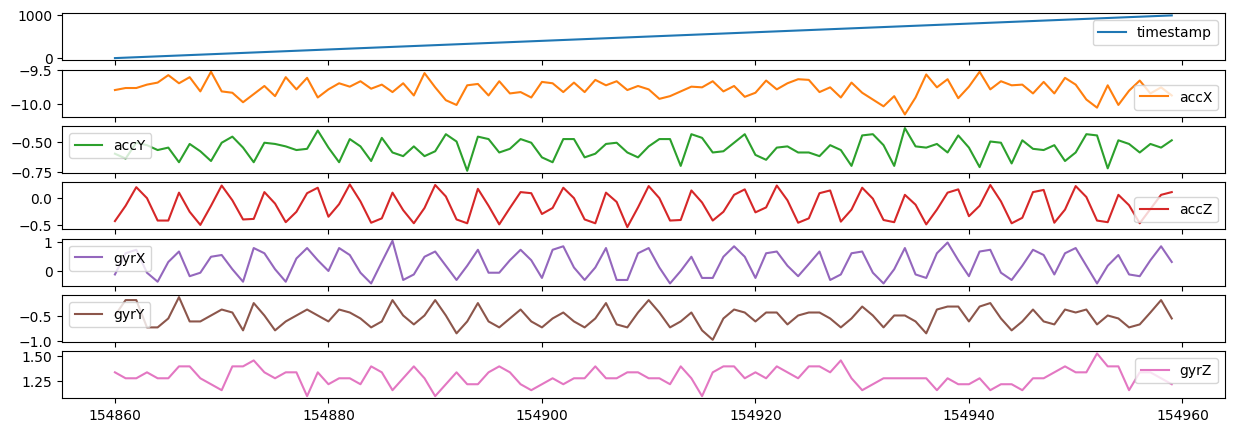

In [8]:
df_combined.tail(100).plot(subplots=True , figsize=(15,5))

## For Balanced CSV file 

In [9]:
#Set working Directory 
os.chdir(r"C:\Users\OmkarRPrabhu\OneDrive - iitgn.ac.in\Documents\GitHub\fault-detection-in-electrical-machines\Induction Motor Primitive Dataset\balanced")

#glob pattern matching -> extension = 'csv' 
extension = 'csv' 

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#All files are imported 

#combining all csv files 
combined_balanced_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

In [10]:
#For exporting all csv files in one 
combined_balanced_csv.to_csv("combined_balanced_csv.csv" , index=False, encoding = "utf-8-sig")

In [11]:
df_balanced = combined_balanced_csv.iloc[:, 0:7]

In [12]:
df_balanced.head(100)

,timestamp,accX,accY,accZ,gyrX,gyrY,gyrZ
0,0,-9.91,-0.44,-0.43,-0.37,-0.73,1.40
1,10,-9.88,-0.62,-0.25,0.55,-0.61,1.28
2,20,-9.80,-0.62,0.14,0.79,-0.49,1.28
3,30,-9.91,-0.46,-0.35,-0.31,-0.79,1.22
4,40,-9.57,-0.68,-0.55,0.12,-0.61,1.16
...,...,...,...,...,...,...,...
95,950,-9.76,-0.48,0.07,0.00,-0.49,1.34
96,960,-9.80,-0.58,-0.32,-0.37,-0.67,1.34
97,970,-9.66,-0.66,0.09,0.85,-0.37,1.28
98,980,-9.69,-0.56,0.22,0.61,-0.31,1.22


In [13]:
df_balanced.tail()

,timestamp,accX,accY,accZ,gyrX,gyrY,gyrZ
42595,950,-9.80,-0.52,-0.13,-0.12,-0.73,1.16
42596,960,-9.65,-0.59,-0.46,-0.18,-0.67,1.34
42597,970,-9.84,-0.52,-0.20,0.37,-0.43,1.34
42598,980,-9.75,-0.55,0.06,0.85,-0.18,1.28
42599,990,-9.87,-0.49,0.11,0.31,-0.55,1.22


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

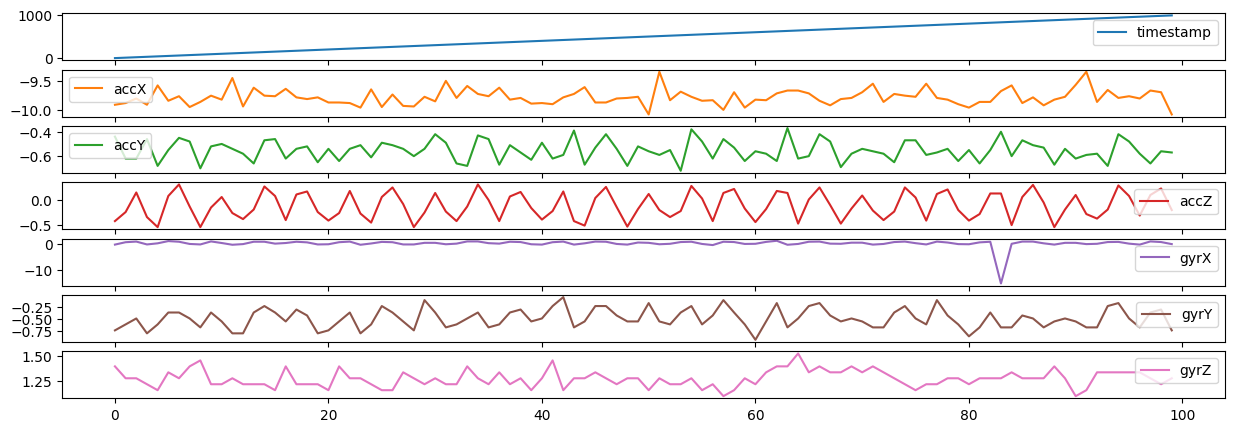

In [14]:
df_balanced.head(100).plot(subplots=True , figsize=(15,5))

## For Unbalanced CSV file

In [15]:
#Set working Directory 
os.chdir(r"C:\Users\OmkarRPrabhu\OneDrive - iitgn.ac.in\Documents\GitHub\fault-detection-in-electrical-machines\Induction Motor Primitive Dataset\unbalanced")

#glob pattern matching -> extension = 'csv' 
extension = 'csv' 

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#All files are imported 

#combining all csv files 
combined_Unbalanced_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

In [16]:
#For exporting all csv files in one 
combined_Unbalanced_csv.to_csv("combined_Unbalanced_csv.csv" , index=False, encoding = "utf-8-sig")

In [17]:
df_Unbalanced = combined_Unbalanced_csv.iloc[:, 0:7]

In [18]:
df_Unbalanced.tail(100)

,timestamp,accX,accY,accZ,gyrX,gyrY,gyrZ
112260,0.0,-10.27,-0.41,-1.28,0.18,-0.73,1.34
112261,10.0,-9.84,-0.67,0.71,2.50,0.43,1.40
112262,20.0,-10.00,-0.44,1.35,1.22,0.06,1.28
112263,30.0,-9.40,-0.55,-0.45,-1.65,-1.16,1.46
112264,40.0,-9.65,-0.39,-1.66,-1.53,-1.40,1.40
...,...,...,...,...,...,...,...
112355,950.0,-9.44,-0.60,-0.51,-1.83,-1.22,1.16
112356,960.0,-9.95,-0.27,-1.50,-1.34,-1.28,1.34
112357,970.0,-9.63,-0.72,-0.37,1.77,0.00,1.34
112358,980.0,-9.87,-0.68,1.31,2.38,0.43,1.22


In [19]:
df_Unbalanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168540 entries, 0 to 112359
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  168300 non-null  float64
 1   accX       168300 non-null  float64
 2   accY       168300 non-null  float64
 3   accZ       168300 non-null  float64
 4   gyrX       168300 non-null  float64
 5   gyrY       168300 non-null  float64
 6   gyrZ       168300 non-null  float64
dtypes: float64(7)
memory usage: 10.3 MB


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

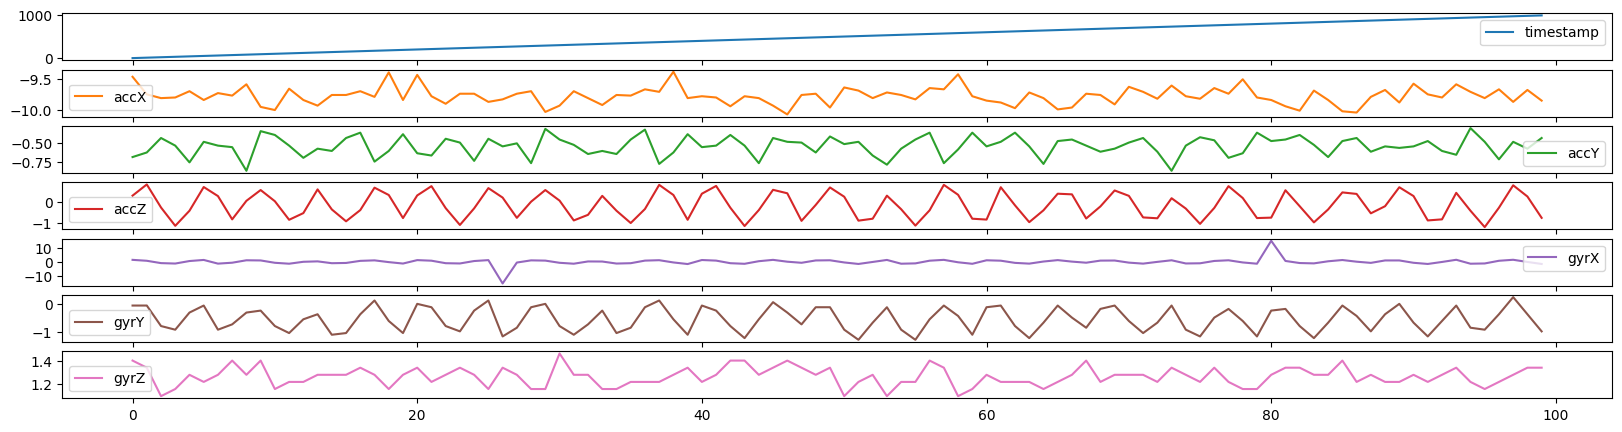

In [20]:
df_Unbalanced.head(100).plot(subplots=True , figsize=(20,5))

### Balanced and Unbalanced Comparison Plots (Offset removed)

<Axes: >

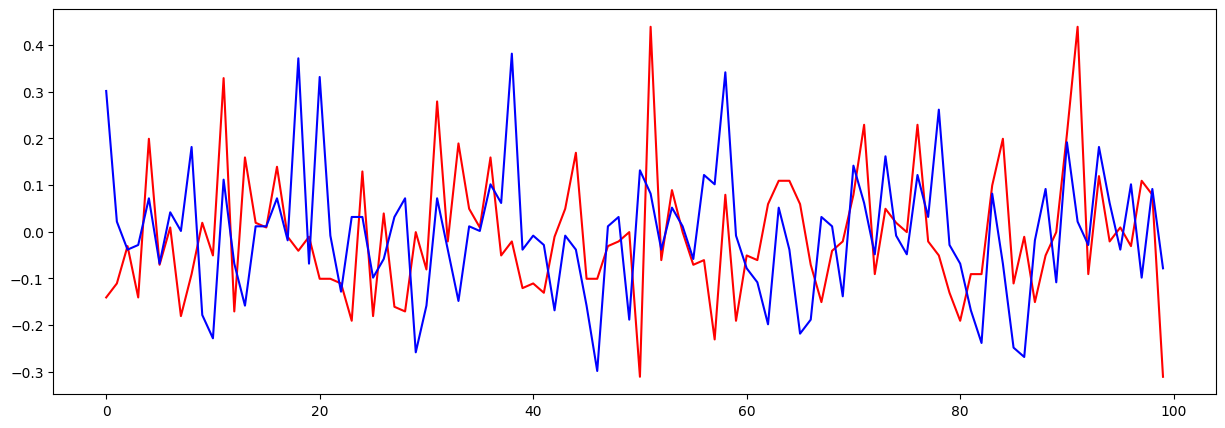

In [21]:
df_balanced["accX"] = df_balanced["accX"] - df_balanced["accX"].mean()
df_Unbalanced["accX"] = df_Unbalanced["accX"] - df_Unbalanced["accX"].mean()

df_balanced["accX"].head(100).plot(figsize=(15,5) , color="r")
df_Unbalanced["accX"].head(100).plot(figsize=(15,5) , color="b")


<Axes: >

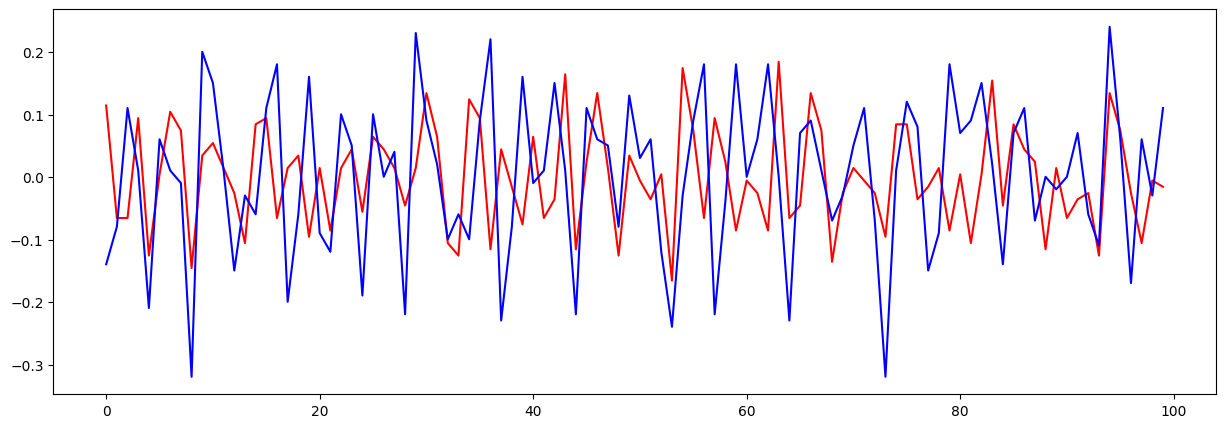

In [22]:
df_balanced["accY"] = df_balanced["accY"] - df_balanced["accY"].mean()
df_Unbalanced["accY"] = df_Unbalanced["accY"] - df_Unbalanced["accY"].mean()

df_balanced["accY"].head(100).plot(figsize=(15,5) , color="r")
df_Unbalanced["accY"].head(100).plot(figsize=(15,5) , color="b")


<Axes: >

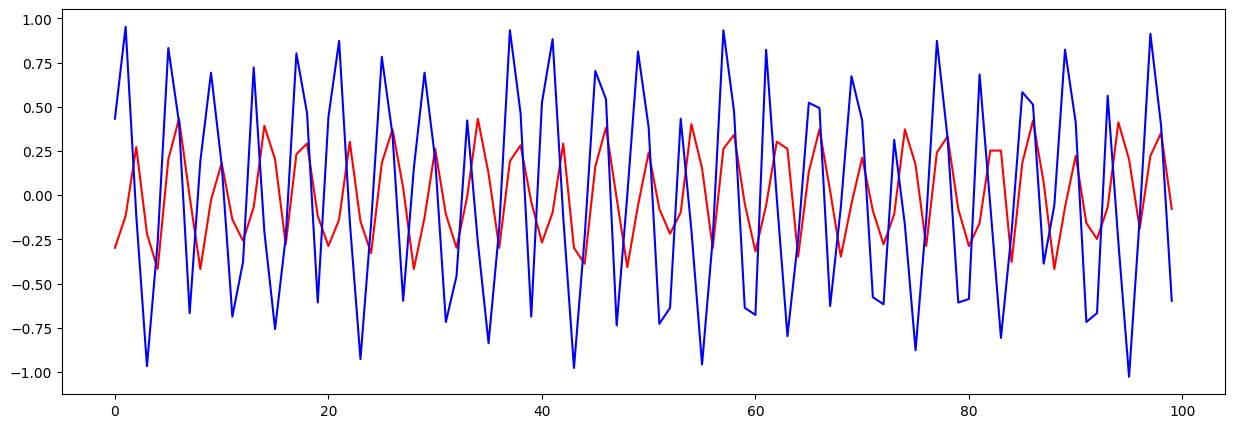

In [23]:
df_balanced["accZ"] = df_balanced["accZ"] - df_balanced["accZ"].mean()
df_Unbalanced["accZ"] = df_Unbalanced["accZ"] - df_Unbalanced["accZ"].mean()

df_balanced["accZ"].head(100).plot(figsize=(15,5) , color="r")
df_Unbalanced["accZ"].head(100).plot(figsize=(15,5) , color="b")


## Combined Small Dataset (24 Base -> 1S3N -> 1S1N)

In [24]:
#Set working Directory 
os.chdir(r"C:\Users\OmkarRPrabhu\OneDrive - iitgn.ac.in\Documents\GitHub\fault-detection-in-electrical-machines\Induction Motor Primitive Dataset\Combined_small_Dataset")

#glob pattern matching -> extension = 'csv' 
extension = 'csv' 

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#All files are imported 

#combining all csv files 
combined_small_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

In [25]:
#For exporting all csv files in one 
combined_small_csv.to_csv("combined_small_csv.csv" , index=False, encoding = "utf-8-sig")

In [26]:
combined_small_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6000 non-null   int64  
 1   accX       6000 non-null   float64
 2   accY       6000 non-null   float64
 3   accZ       6000 non-null   float64
 4   gyrX       6000 non-null   float64
 5   gyrY       6000 non-null   float64
 6   gyrZ       6000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 375.0 KB


In [27]:
df_Combined_small = combined_small_csv.iloc[:, 0:4]

In [28]:
df_Combined_small

,timestamp,accX,accY,accZ
0,0,-9.47,-0.69,0.28
1,10,-9.75,-0.63,0.80
2,20,-9.81,-0.44,-0.27
3,30,-9.80,-0.54,-1.12
4,40,-9.70,-0.76,-0.42
...,...,...,...,...
2995,950,-9.55,-0.53,-0.36
2996,960,-9.85,-0.60,-0.36
2997,970,-9.67,-0.65,-0.09
2998,980,-9.80,-0.51,-0.10


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

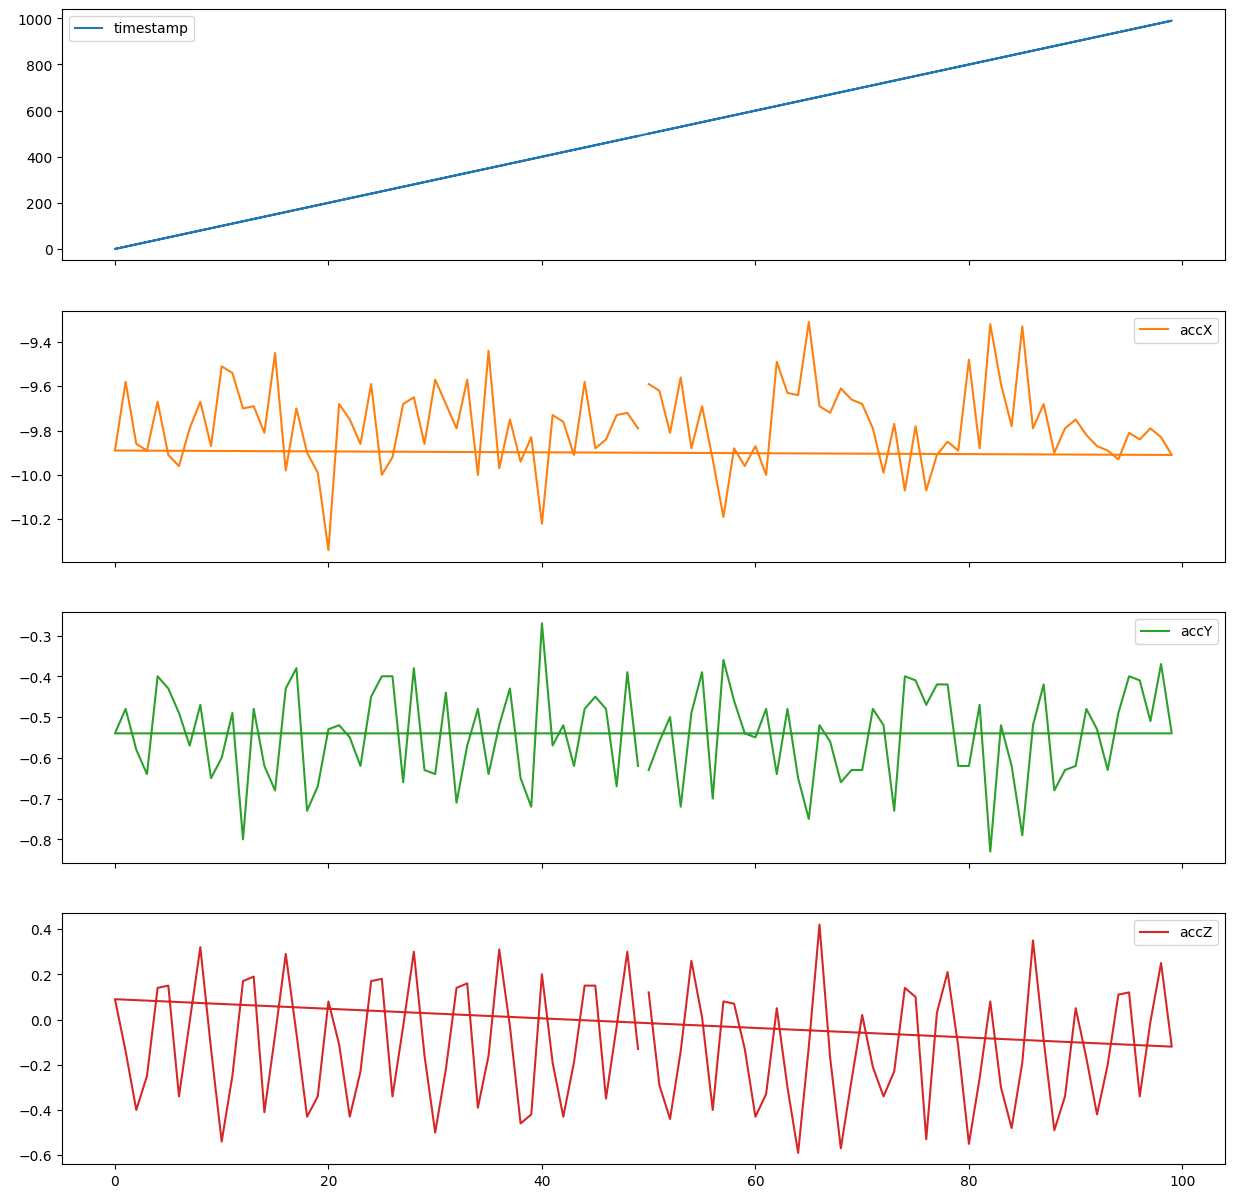

In [29]:
df_Combined_small.iloc[2350:2450 , :].plot(subplots = True , figsize= (15,15))

# Anamoly Detection Using Auto Encoders 


### Import Libraries 

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam

### Data Preprocessing 

In [31]:
df = df_Combined_small

train_size = int(len(df) * 0.8) # 80% size for training set
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:]

In [32]:
train.shape,test.shape

((4800, 4), (1200, 4))

In [33]:
# Normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])  

In [34]:
sequence_length = 100

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Create sequences
sequences = create_sequences(df_scaled, sequence_length)

In [50]:
# Check for NaNs and Infs
assert not np.any(np.isnan(df_scaled)), "Data contains NaNs"
assert not np.any(np.isinf(df_scaled)), "Data contains infinite values"

print("Max value:", np.max(df_scaled))
print("Min value:", np.min(df_scaled))

Max value: 4.263877860177513
Min value: -4.789555433435566


In [51]:
# Autoencoder model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(sequence_length, df_scaled.shape[1]), return_sequences=True),
    LSTM(16, activation='relu', return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    TimeDistributed(Dense(df_scaled.shape[1]))
])

In [59]:
optimizer = Adam(learning_rate=1e-10, clipnorm=1.0)
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(sequences, sequences, epochs=5, batch_size=32, verbose=1)

# Reconstruct sequences
reconstructed_sequences = model.predict(sequences)

Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: nan
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: nan
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: nan
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: nan
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: nan
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


In [60]:
# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(sequences - reconstructed_sequences), axis=1)

# Set anomaly threshold
threshold = 0.05  # Adjust threshold as needed

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Map anomalies back to the original dataframe length
anomaly_indices = np.where(anomalies)[0]
anomaly_timestamps = df.iloc[anomaly_indices + sequence_length - 1]['timestamp']

# Print detected anomalies
print("Detected anomalies at timestamps:")
print(anomaly_timestamps)


Detected anomalies at timestamps:
Series([], Name: timestamp, dtype: int64)


In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import RMSprop


# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])  # Exclude timestamp column from scaling

# Ensure data does not contain NaNs, infinite, or extreme values
assert not np.any(np.isnan(df_scaled)), "Data contains NaNs"
assert not np.any(np.isinf(df_scaled)), "Data contains infinite values"
print("Max value:", np.max(df_scaled))
print("Min value:", np.min(df_scaled))

# Define sequence length (e.g., 100)
sequence_length = 100

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# Create sequences
sequences = create_sequences(df_scaled, sequence_length)

# Define simplified autoencoder model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(sequence_length, df_scaled.shape[1]), return_sequences=True),
    LSTM(16, activation='relu', return_sequences=False),
    RepeatVector(sequence_length),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    TimeDistributed(Dense(df_scaled.shape[1]))
])

# Define optimizer with gradient clipping
optimizer = RMSprop(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(sequences, sequences, epochs=10, batch_size=32, verbose=1)

# Reconstruct sequences
reconstructed_sequences = model.predict(sequences)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(sequences - reconstructed_sequences), axis=(1, 2))


Max value: 4.263877860177513
Min value: -4.789555433435566
Epoch 1/10


c:\Users\OmkarRPrabhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 1.0032
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 1.0053
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 1.0059
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 1.0129
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 1.0044
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.9951
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 1.0055
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.9925
Epoch 9/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.9970
Epoch 10/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 1.0260
185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Detected anomalies at timestamps:
99      990
0         0
1        10
2        20
3        30
       ... 
2995    950
2996    960
2997    970
2998    980
2999    990
Name: timestamp, Length: 5901, dtype: int64


In [67]:
anomaly_timestamps# Set anomaly threshold
threshold = 0.95  # Adjust threshold as needed

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Map anomalies back to the original dataframe length
anomaly_indices = np.where(anomalies)[0]
anomaly_timestamps = df.iloc[anomaly_indices + sequence_length - 1]['timestamp']

# Print detected anomalies
print("Detected anomalies at timestamps:")
print(anomaly_timestamps)

Detected anomalies at timestamps:
99      990
0         0
1        10
2        20
3        30
       ... 
2718    180
2719    190
2720    200
2721    210
2722    220
Name: timestamp, Length: 1735, dtype: int64


In [68]:
len(anomaly_timestamps)

1735

In [69]:
len(df_scaled)

6000